# Table of Contents
* [1. Le chemostat](#1.-Le-chemostat)
	* [1.1 Définition](#1.1-Définition)
		* [1.1.1 Exemples de $\mu$](#1.1.1-Exemples-de-$\mu$)
	* [1.2 Modélisation](#1.2-Modélisation)
		* [1.2.1 Mode batch](#1.2.1-Mode-batch)
		* [1.2.2 Culture continue](#1.2.2-Culture-continue)
	* [1.3 Comportement asymptotique](#1.3-Comportement-asymptotique)
		* [1.3.1 Points d'équilibre](#1.3.1-Points-d'équilibre)
		* [1.3.2 Stabilité](#1.3.2-Stabilité)
		* [1.3.3 Monod vs Haldane](#1.3.3-Monod-vs-Haldane)


# 1. Le chemostat

- les articles pionniers: [[Monod 1950](#cite-monod1950a)] et [[Novick 1950](#cite-novick1950a)]
- un classique: [[Smith et Waltman 1995](#cite-smith1995a)]
- une référence plus récente : [[Ching Shan Chou et Friedman 2016](#cite-chingshanchou2016a)]

## 1.1 Définition

Le chemostat ou bioréacteur est un procédé de culture de microorganismes en continu. Le bioréacteur est continument alimenté  en nutriments (substrat) qui est consommé par les microorganismes qui se multiplient. Les microorganismes et le substrat sont continument soutirés du réacteur, contrôlant ainsi le volume au sein du réacteur.


<img src="./images/chemostat.png" alt="chemostat" style="width: 550px;"/>

On définit:

- $V(t)$ le volume du réacteur (en litre $l$)
- $D_{in}(t)$ et $D_{out}(t)$ les débits en entrée et sortie ($l/h$)
- la concentration en substrat en entrée $S_{in}(t)$ ($g/l$)
- les concentrations en substrat $S(t)$ et en biomasse $X(t)$ au sein du réacteur ($g/l$)

Au sein du réacteur unne réaction transforme le subtrat en biomasse:
$$
   k\,S  \xrightarrow[]{r} X
$$
où $r=\mu\,X$ est le taux de la réaction (exprimé en $1/h$), $k$ est une constante stoechiométrique (adimensionnel)

### 1.1.1 Exemples de $\mu$

$\mu=\mu(S)$ dépend de la concentration en substrat, 3 cas:

- linéaire: $\mu(S)=\rho\,S$
- Monod (saturation): $\mu(S)=\mu_{max}\,\frac{S}{K+S}$
- Haldane (inhibition): $\mu(S)=\mu^* \,\frac{S}{K+S+S^2/K_i}$

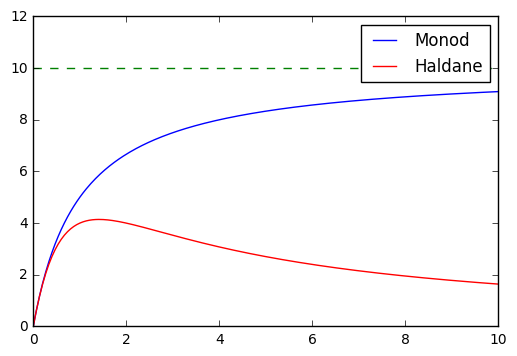

In [22]:
import numpy as np
import matplotlib.pyplot as plt
mumax, K, mustar, Ki = 10, 1, 10, 2
s0, s1 = 0, 10
les_s = np.linspace(s0,s1,300, endpoint=True)

monod = lambda s: mumax*s/(K+s)
haldane = lambda s: mustar*s/(K+s+s*s/Ki)

plt.plot(les_s, monod(les_s), label='Monod')
plt.plot(les_s, mumax*np.ones_like(les_s), linestyle='--')
plt.plot(les_s, haldane(les_s), label='Haldane')
plt.ylim([0,mumax*1.2])
plt.legend()
plt.show()

## 1.2 Modélisation

Le bilan des masses entre $t$ te $t+\delta$ au sein du chemostat (loi de conservation de la masse):

\begin{align*}
  [V\,X](t+\delta)  -  [V\,X](t) 
  &= \hphantom{D_{in}\,S_{in}\,\delta}-D_{out}\,X\,\delta + \mu\,V\,X \,\delta
  \\
  [V\,S](t+\delta)  -  [V\,S](t)
  &= D_{in}\,S_{in}\,\delta -D_{out}\,S\,\delta - k\,\mu\,V\,X \,\delta
  \\
  V(t+\delta) -  V(t) 
  &= D_{in} \,\delta -D_{out}\,\delta 
\end{align*}

on divise par $\delta$ et on fait $\delta\to 0$:

\begin{align*}
  d [V\, X]/dt  
  &= \hphantom{D_{in}\,S_{in}}-D_{out}\,X+ \mu\,V\,X
  \\
  d[V\, S]/dt 
  &= D_{in}\,S_{in} -D_{out}\,S - k\,\mu\,V\,X
  \\
  dV(t)/dt 
  &= D_{in} - D_{out} 
\end{align*}


mais $d [V X]/dt=\dot V\,X+V\,\dot X$ et $d [V\, S]/dt=\dot V\,S+V\,\dot S$

\begin{align*}
  \dot V\,X+V\,\dot X 
  &= \hphantom{D_{in}\,S_{in}}-D_{out}\,X+ \mu\,V\,X
  \\
  \dot V\,S+V\,\dot S
  &= D_{in}\,S_{in} -D_{out}\,S - k\,\mu\,V\,X
  \\
  \dot V 
  &= D_{in} - D_{out} 
\end{align*}

finalement

\begin{align*}
  \dot X 
  &= -\frac{D_{in}}{V}\,X+ \mu\,X
  \\
  \dot S
  &= \frac{D_{in}}{V}\,[S_{in}-S] - k\,\mu\,X
  \\
  \dot V 
  &= D_{in} - D_{out} 
\end{align*}
on introduit le taux de dilution $D:=D_{in}/V$ (en $1/l$):

\begin{align*}
  \dot X 
  &= -D\,X+ \mu\,X
  \\
  \dot S
  &= D\,[S_{in}-S] - k\,\mu\,X
  \\
  \dot V 
  &= D_{in} - D_{out} 
\end{align*}

Trois possibilités:

- le mode **batch** où $D_{in}=D_{out}=0$
- le mode **fed batch** où $D_{in}>0$ et $D_{out}=0$
- le mode de **culture continue** où $D_{in}=D_{out}>0$ donc le volume est constant

### 1.2.1 Mode batch

Supposons $D=0$ et $\mu = \rho\,S$

\begin{align*}
  \dot X 
  &= \rho\,S\,X
  \\
  \dot S
  &= - k\,\rho\,S\,X
\end{align*}
donc $\dot S +k\,\dot X$ d'où $S +k\,X$ est une constant, on pose $\gamma:= S +k\, X$, on obtient:

\begin{align*}
  \dot X 
  &= \rho\,[\gamma-k\,X]\,X
\end{align*}
c'est la courbe logistique $K=\gamma/k$ est la capacité d'acceuil et $r=\rho\,\gamma$ est la taux de croissance maximal.

### 1.2.2 Culture continue

Ici $V$ est constant et on suppose que $\mu$ dépend de $S$:
\begin{align*}
  \dot X 
  &= [\mu(S)-D]\,X
  \\
  \dot S
  &= D\,[S_{in}-S] - k\,\mu(S)\,X
\end{align*}

où

- $1/k$ est un coefficient de rendement
- $\mu(S)$ est le taux de croissance spécifique

## 1.3 Comportement asymptotique

### 1.3.1 Points d'équilibre

On pose $x=(S,X)$ et 
$$
    f(x)=f(S,X) = \left(\begin{array}{c}D\,[S_{in}-S] - k\,\mu(S)\,X \\ [\mu(S)-D]\,X\end{array}\right)
$$
On cherche les points $(S,X)$ tels que $f(S,X)=0$:

- lessivage: $E_l=(S_s,X_l)=(0,0)$
- équilibre souhaité: $E^*=(S^*,X^*)$ avec: $\mu(S^*)=D$, i.e. $S^*=\mu^{-1}(D)$ (quand c'est possible) et $X^*=(S_{in}-S^*)/k$

### 1.3.2 Stabilité

Le point d'équilibre $E^*$ existe et est stable si et seulement si:

$$
  J=
  \left(\begin{array}{cc}
  \partial f_1/\partial S & \partial f_1/\partial X
  \\
  \partial f_2/\partial S & \partial f_2/\partial X
  \end{array}\right)
  (S^*,X^*)
  =
  \left(\begin{array}{cc}
  D-k\,\mu'(S^*)\,X^* & -k\,D
  \\
  \mu'(S^*)\,X & 0
  \end{array}\right)
$$

$Tr(J)=-D-k\,\mu'(S^*)\,X^*<0$ et $det(J)=k\,D\,\mu'(S^*)\,X>0$ ainsi les valeurs propres ont des parties réelles négatives (voir [ici](https://fr.wikipedia.org/wiki/Théorie_de_la_stabilité)).

### 1.3.3 Monod vs Haldane

Dans le cas Monod: un seul point d'équilibre stable dans les conditions précédentes

Dans le cas Haldane, l'équation $\mu(S)=D$ peut avoir 2 solutions $S_1^*<S_2^*$

- $(S^*_1,(S_{in}-S_1^*)/k)$ existe si et seulement si $S^*_1<S_{in}$, c'est un point stable
- $(S^*_2,(S_{in}-S_2^*)/k)$ existe si et seulement si $S^*_2<S_{in}$, c'est un point instable




<table >
  <tr>
    <td><img src="./images/stab_monod.png" alt="stab monod" style="width: 350px;"/></td>
    <td><img src="./images/stab_haldane.png" alt="stab haldane" style="width: 350px;"/></td>
  </tr>
</table>



<!--bibtex

@book{chingshanchou2016a,
	Author = {Ching Shan Chou and Avner Friedman},
	Publisher = {Springer International Publishing},
	Title = {Introduction to Mathematical Biology: Modeling, Analysis, and Simulations},
	Year = {2016}}

@article{monod1950a,
	Author = {Monod, Jacques},
	Journal = {Annales de l'Institut Pasteur},
	Number = {4},
	Pages = {390-410},
	Title = {La technique de culture continue, th{\'e}orie et applications},
	Volume = {79},
	Year = {1950}}

@article{novick1950a,
	Author = {Aaron Novick and Szilard, Leo},
	Journal = {Science},
	Number = {2920},
	Pages = {715-716},
	Title = {Description of the Chemostat},
	Volume = {112},
	Year = {1950}}


@book{smith1995a,
	Author = {Hal L. Smith and Paul E. Waltman},
	Publisher = {{Cambridge University Press}},
	Title = {The Theory of the Chemostat: Dynamics of Microbial Competition},
	Year = {1995}}


---->

# References

<a name="cite-monod1950a"/><sup>[^](#ref-1) </sup>Monod, Jacques. 1950. _La technique de culture continue, th&eacute;orie et applications_.

<a name="cite-novick1950a"/><sup>[^](#ref-2) </sup>Aaron Novick and Szilard, Leo. 1950. _Description of the Chemostat_.

<a name="cite-smith1995a"/><sup>[^](#ref-3) </sup>Hal L. Smith and Paul E. Waltman. 1995. _The Theory of the Chemostat: Dynamics of Microbial Competition_.

